# **Error Correction with the Shor Code**
---

## **Introduction** 
This project extends your work in Week 21 to implement, simulate, and analyze the first ever error correction code proposed that can handle *any* single qubit errors (bit-flips, phase-flips, or others) using the Shor code (Sho95).

<br>

## **Description**
The Shor code is a natural extension of the Bit- and Phase- flip codes that avoid syndrome measurements where:

* A **bit-flip error** means $|0\rangle$ unintentionally turning into $|1\rangle$ or vice versa.
* A **phase-flip error** means $|+\rangle$ unintentionally turning into $|-\rangle$ or vice versa.

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

<br>

## **Key Questions**
In this project, you will answer the following questions:
1. How does using the Shor code compare to using no error correction? Are there any trends you notice?

1. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?

1. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?

<br>

## **Structure**
This project is broken into 3 parts:
> **Part 1**: Defining the Components
>
>> **Part 1.1**: The Phase-Flip Code
>>
>> **Part 1.2**: The Bit-Flip Code
>
> **Part 2**: Implementing the Shor Code
>
> **Part 3**: Analyzing the Shor Code
>
> **Wrapping Up**

<br>

## **Resources**
* [Week 21 Lab Solutions (Bit-Flip Code and Noise Models)](https://drive.google.com/file/d/1nbNfFwUp4eefAR95AG5q_nKSNAMgLmsc/view?usp=share_link)
* [Week 21 Homework Solutions (Phase-Flip Code)](https://colab.research.google.com/drive/1BYZrbBJKTtCCm11Z7No6rNN114fgllhU?usp=sharing)
* [Qiskit's `circuit.compose(...)` function documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html)
* [Qiskit's `Statevector(...)` documentation](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html)
* [Quantum Error Correction for Beginners](https://arxiv.org/pdf/0905.2794.pdf)
* [Scheme for reducing decoherence in quantum computer memory](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.R2493): The original paper from by Shor proposing this code (behind a paywall)

---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [1]:
#!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

from random import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## **Part 1: Defining the Components**
---

In this section, we will define the key components of the Shor code through these parts:

**Part 1.1**: The 3-qubit phase-flip code.

**Part 1.2**: The 3-qubit bit-flip code.

---
### **Part 1.1: The Phase-Flip Code**


In this section, we will define two circuits pertaining to the phase-flip code:
1. `phaseflip_encode`: A 3-qubit phase-flip logical to physical encoding.
1. `phaseflip_correct`: A 3-qubit phase-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `phaseflip_encode` circuit that encodes a logical state into a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [2]:
phaseflip_encode =QuantumCircuit(3) # COMPLETE THIS LINE

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [3]:
phaseflip_encode.cx(0,1)# COMPLETE THIS LINE
phaseflip_encode.cx(0,2)# COMPLETE THIS LINE

##### **3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

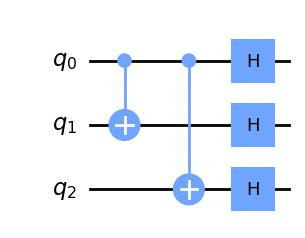

In [4]:
phaseflip_encode.h(0)# COMPLETE THIS LINE
phaseflip_encode.h(1)# COMPLETE THIS LINE
phaseflip_encode.h(2)# COMPLETE THIS LINE

phaseflip_encode.draw()

#### **Exercise #2**

Create the `phaseflip_correct` circuit that detects and corrects errors in a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [5]:
phaseflip_correct = QuantumCircuit(3) # COMPLETE THIS LINE

##### **2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.**



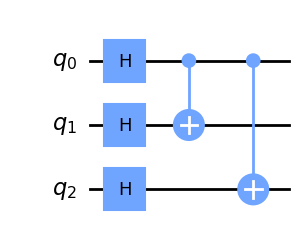

In [6]:
phaseflip_correct.h(0)
phaseflip_correct.h(1)
phaseflip_correct.h(2)

phaseflip_correct.cx(0, 1) 
phaseflip_correct.cx(0, 2)# COMPLETE THIS CODE

phaseflip_correct.draw()

##### **3. Correct any errors using a Toffoli gate.**



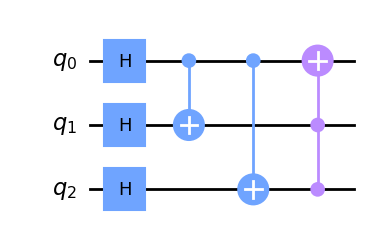

In [7]:
phaseflip_correct.ccx(2, 1, 0)# COMPLETE THIS CODE

phaseflip_correct.draw()

#### **Exercise #3**

Simulate the full phase-flip code for the $|+\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Qiskit's `.compose(...)` function allows us to combine different circuits in a number of ways. We will use this throughout the notebook to build up a full Shor code, but since this is the first time you are seeing it we have provided it for you.

**Run the code below to compose the encoding and correcting circuits.**

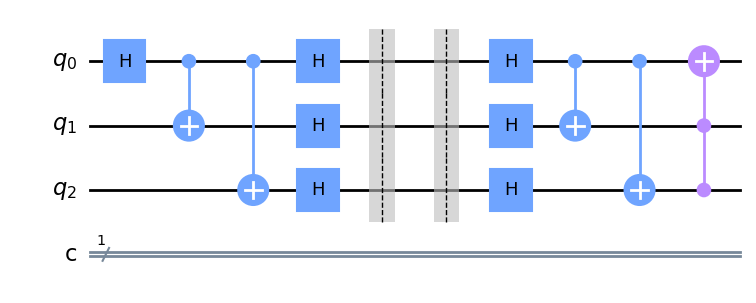

In [8]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [9]:
initial_state.equiv(final_state)

True

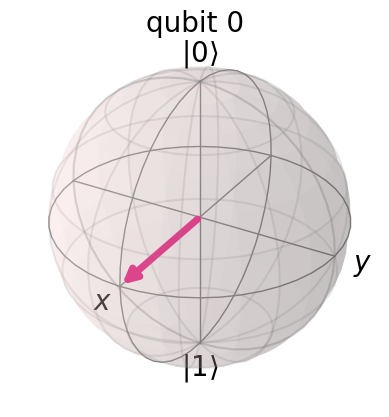

In [10]:
initial_state.draw(output = 'bloch')

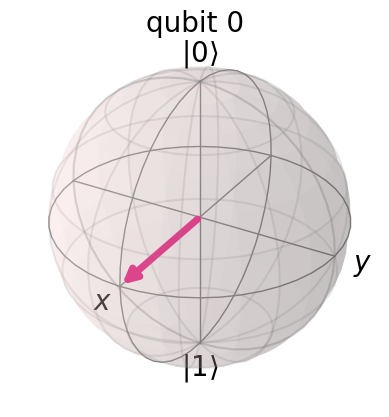

In [10]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full phase-flip code for the $|-\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

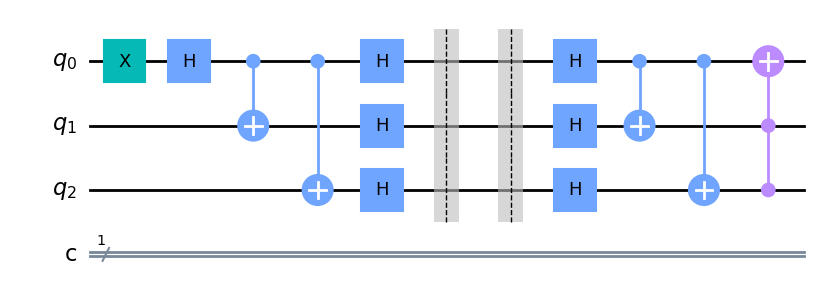

In [44]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [45]:
initial_state.equiv(final_state)

True

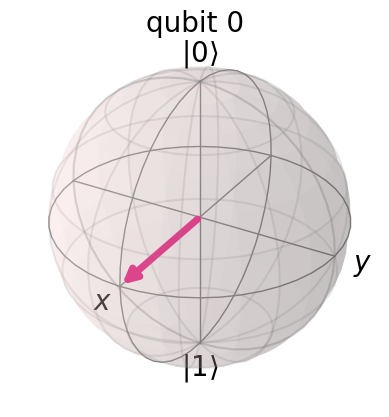

In [14]:
initial_state.draw(output = 'bloch')

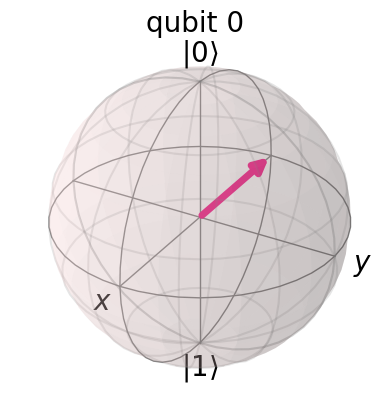

In [46]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full phase-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

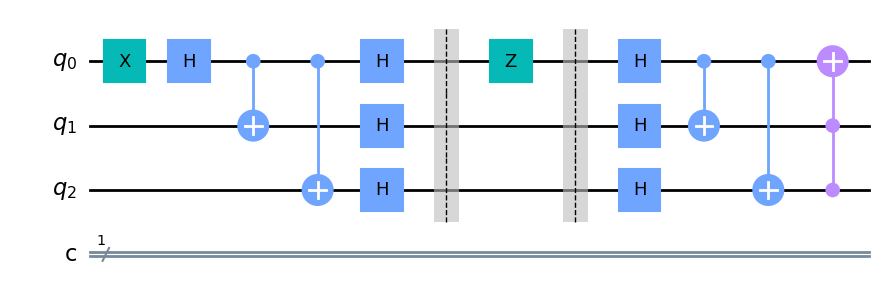

In [47]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
phaseflip_error=QuantumCircuit(3)
phaseflip_error.z(0)
full_code = full_code.compose(phaseflip_error)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [48]:
initial_state.equiv(final_state)

True

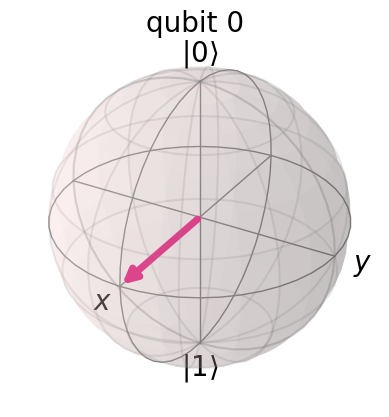

In [16]:
initial_state.draw(output = 'bloch')

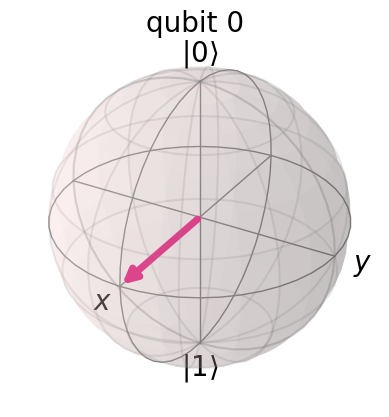

In [17]:
final_state.draw(output = 'bloch')

#### **Exercise #6**

Simulate the full phase-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.

##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

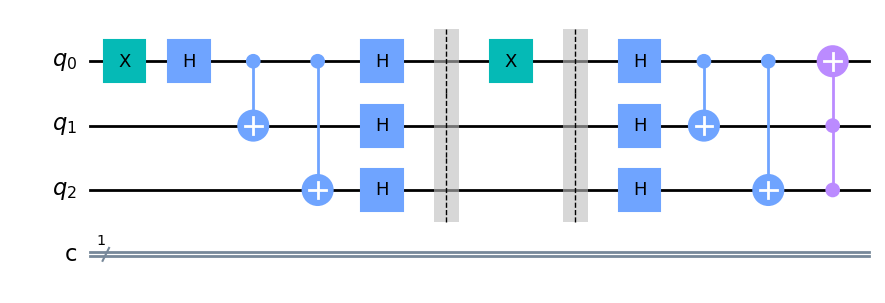

In [49]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
bitflip_error=QuantumCircuit(3)
bitflip_error.x(0)
full_code = full_code.compose(bitflip_error)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [50]:
initial_state.equiv(final_state)

False

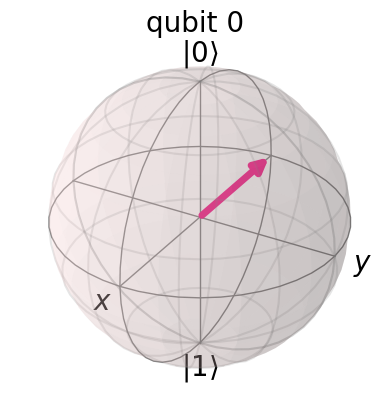

In [52]:
initial_state.draw(output = 'bloch')

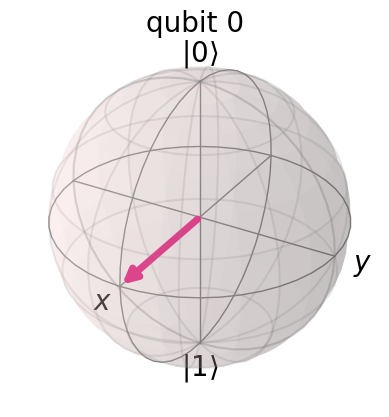

In [51]:
final_state.draw(output = 'bloch')

---
### **Part 1.2: The Bit-Flip Code**


In this section, we will define two circuits pertaining to the bit-flip code:
1. `bitflip_encode`: A 3-qubit bit-flip logical to physical encoding.
1. `bitflip_correct`: A 3-qubit bit-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `bitflip_encode` circuit that encodes a logical state into a 3-qubit bitflip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [22]:
bitflip_encode =QuantumCircuit(3) # COMPLETE THIS LINE

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [23]:
bitflip_encode.cx(0,1)# COMPLETE THIS LINE
bitflip_encode.cx(0,2)# COMPLETE THIS LINE

#### **Exercise #2**

Create the `bitflip_correct` circuit that detects and corrects errors in a 3-qubit bit-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [24]:
bitflip_correct = QuantumCircuit(3)# COMPLETE THIS LINE

##### **2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.**



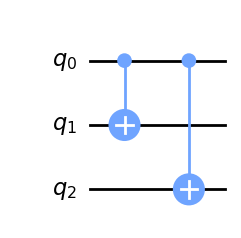

In [25]:
bitflip_correct.cx(0,1)
bitflip_correct.cx(0,2)
# COMPLETE THIS CODE

bitflip_correct.draw()

##### **3. Correct any errors using a Toffoli gate.**



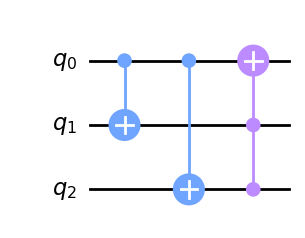

In [26]:
bitflip_correct.ccx(2,1,0)# COMPLETE THIS CODE

bitflip_correct.draw()

#### **Exercise #3**

Simulate the full bit-flip code for the $|0\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Adapt this step from the phase-flip code developed in Part 1.1 for the bit-flip code we have developed just above. 

**NOTE**: This is almost entirely just a changle of variable names.

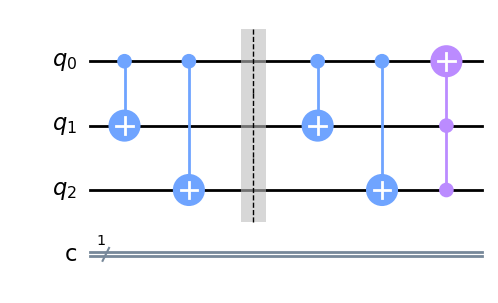

In [32]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# bitflip_error=QuantumCircuit(3)
# bitflip_error.x(0)
# full_code = full_code.compose(bitflip_error)

# full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [33]:
initial_state.equiv(final_state)

True

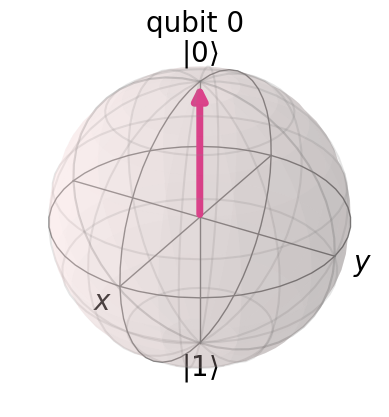

In [35]:
initial_state.draw(output = 'bloch')

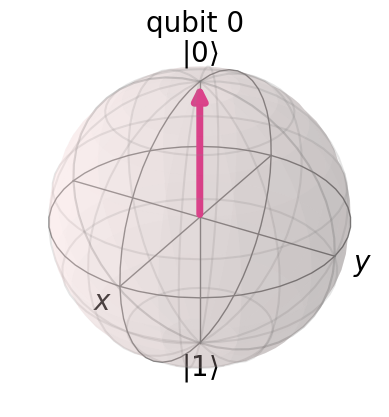

In [34]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full bit-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

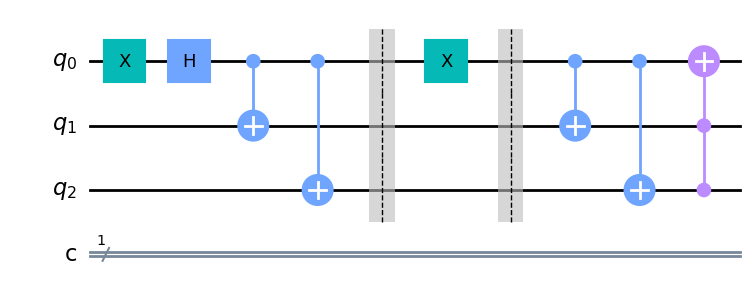

In [36]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
bitflip_error=QuantumCircuit(3)
bitflip_error.x(0)
full_code = full_code.compose(bitflip_error)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE# COMPLETE THIS CODE# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [37]:
initial_state.equiv(final_state)

True

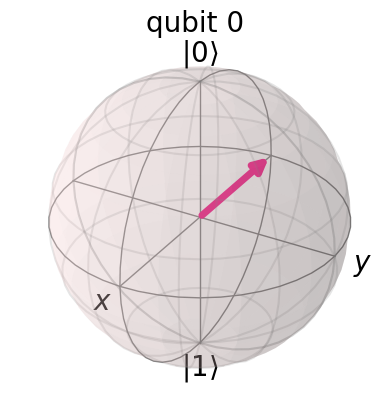

In [38]:
initial_state.draw(output = 'bloch')

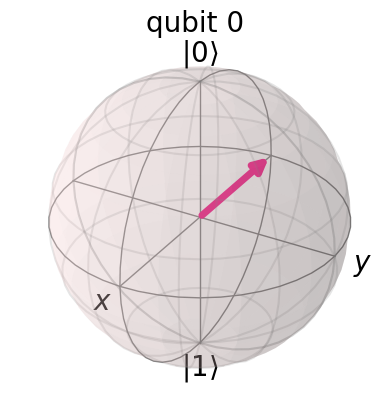

In [39]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full bit-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

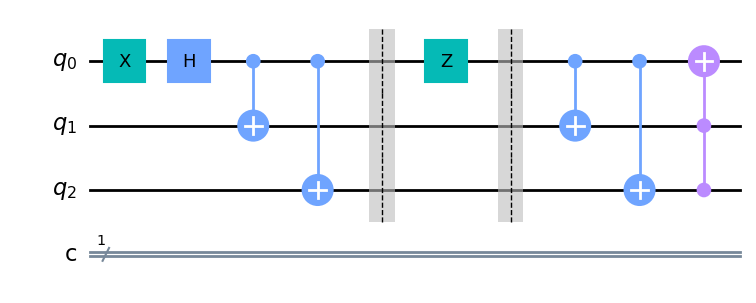

In [40]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
phase_flip_error=QuantumCircuit(3)
phase_flip_error.z(0)
full_code = full_code.compose(phase_flip_error)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()# COMPLETE THIS CODE# COMPLETE THIS CODE# COMPLETE THIS CODE# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [41]:
initial_state.equiv(final_state)

False

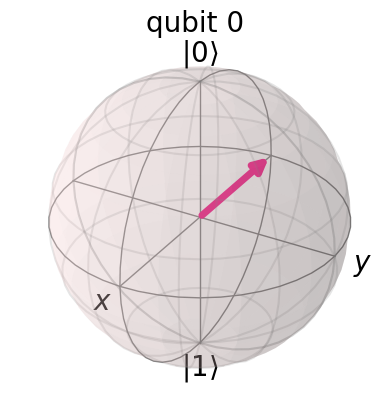

In [42]:
initial_state.draw(output = 'bloch')

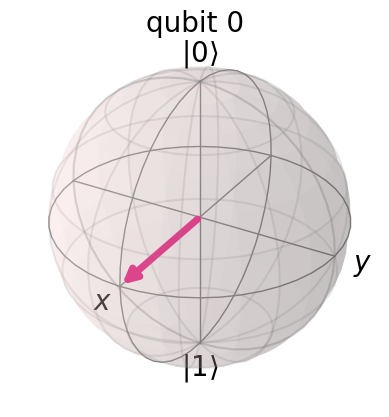

In [43]:
final_state.draw(output = 'bloch')

## **Part 2: Implementing the Shor Code**
---

In this section, we will build on the work from the last section to implement Shor's code in full.

### **Exercise #1**

Initialize a circuit with the correct number of qubits. It is up to you to determine the correct number based on the description of the code below and any other resources at your disposal.

<br>

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

In [85]:
shor_encode = QuantumCircuit(9)#COMPLETE THIS LINE

### **Exercise #2**

Complete the code below using every 3rd qubit for the phase-flip code.

In [86]:
shor_encode = shor_encode.compose(phaseflip_encode, qubits = [2,1,0])# COMPLETE THIS LINE

### **Exercise #3**

Complete the code below to encode each of the phase-flip code qubits using their own bit-flip code.

In [87]:
shor_encode = shor_encode.compose(bitflip_encode, qubits =[0,1,2])# COMPLETE THIS CODE

### **Exercise #4**

Now, initialize the correcting circuit with the correct number of qubits.

In [88]:
shor_correct = QuantumCircuit(9)# COMPLETE THIS LINE

### **Exercise #5**

For the same qubits that you encoded in Exercise #3, correct any bit-flips.

In [89]:
shor_correct = shor_correct.compose(bitflip_correct,qubits =[0,1,2])# COMPLETE THIS CODE

### **Exercise #6**

For the same qubits that you encoded in Exercise #2, correct any phase-flips.

In [90]:
shor_correct = shor_correct.compose(phaseflip_correct,qubits =[0,1,2])# COMPLETE THIS LINE

### **Exercise #7**

**Verify your implementation is correct by running the code below.**

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

In [91]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

Traceback (most recent call last):
  Cell In[91], line 33
    final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
  File /opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/densitymatrix.py:813 in to_statevector
    raise QiskitError("Density matrix is not a pure state")
QiskitError: 'Density matrix is not a pure state'

Use %tb to get the full traceback.


##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [92]:
initial_state.equiv(final_state)

False

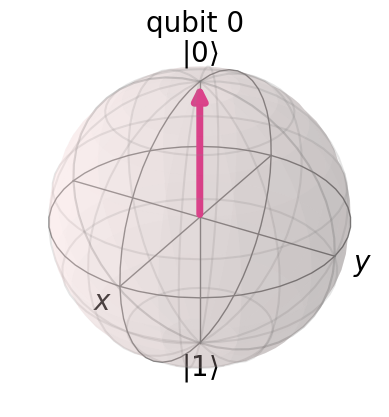

In [ ]:
initial_state.draw(output = 'bloch')

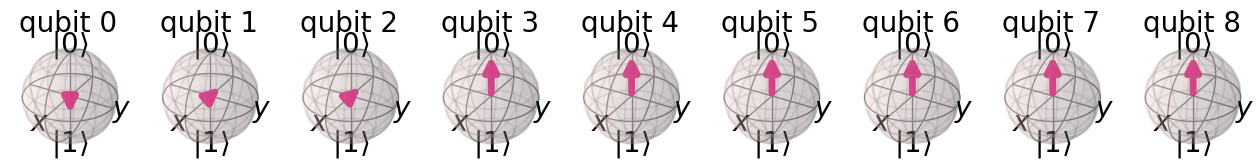

In [93]:
final_state.draw(output = 'bloch')

### **Exercise #8**

By only adjusting the qiskit code in the ERRORS section, determine a way to break this error correcting code (there are many solutions). For reference, there are actually 2 valid ways to break this code: 
1. The qiskit code runs, but the initial and final states do not match.
2. The qiskit code itself doesn't run and gives the following output: ```QiskitError: 'Density matrix is not a pure state'```. 



**NOTE**: If you're curious, the second error is a sign of a change in the quantum state so serious that the qiskit function for creating the statevector effectively fails. In quantum physics, this particular change is called going from a "pure state" to a "mixed state".

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

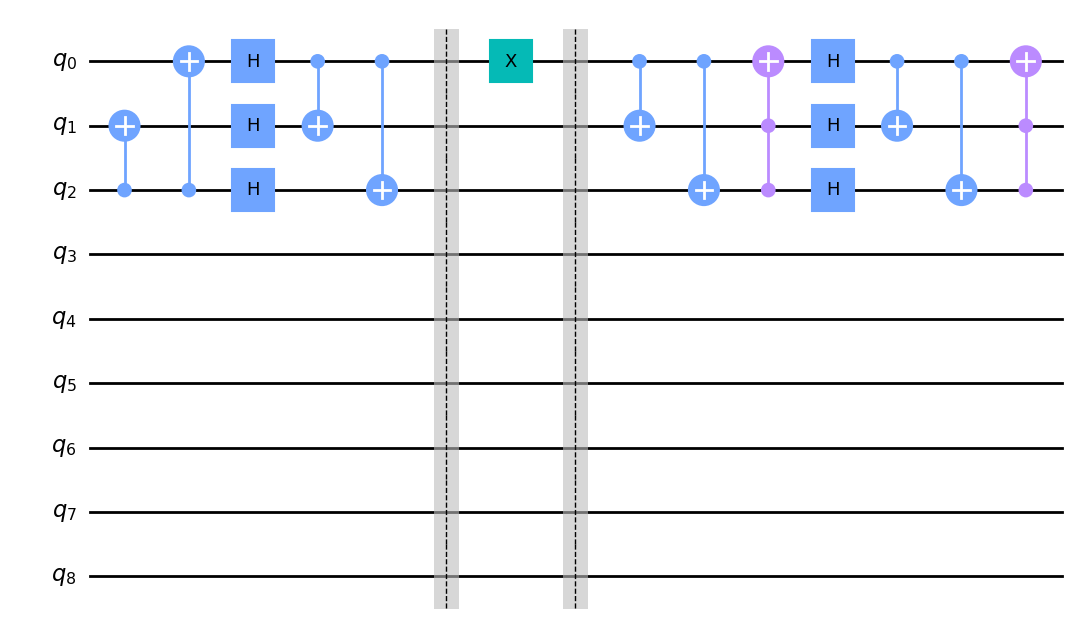

In [104]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [105]:
initial_state.equiv(final_state)

True

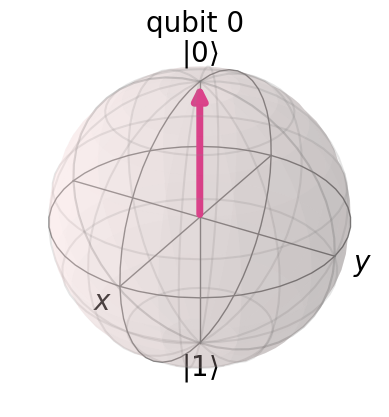

In [96]:
initial_state.draw(output = 'bloch')

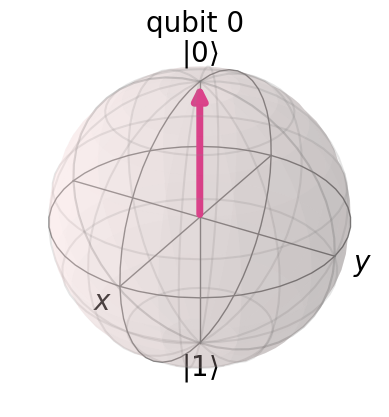

In [106]:
final_state.draw(output = 'bloch')

### **Exercise #9**

Simulate the Shor code for bit and phase-flip errors that occur 10% of the time.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

The code below introduces bit and phase-flip errors 50% of the time. Change the necesssary line(s) so that these errors only occur 10% of the time.

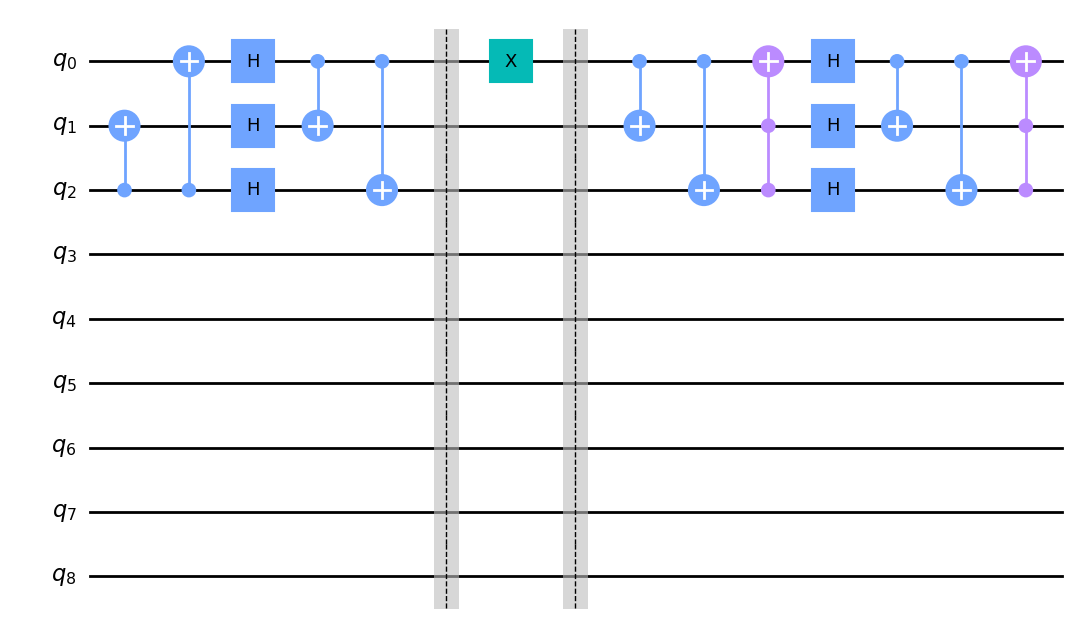

In [107]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < 0.10:
    full_code.x(i)
  if random() < 0.10:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [108]:
initial_state.equiv(final_state)

True

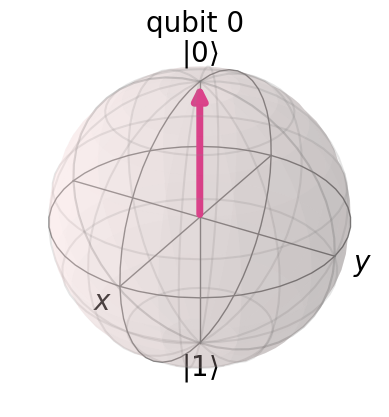

In [100]:
initial_state.draw(output = 'bloch')

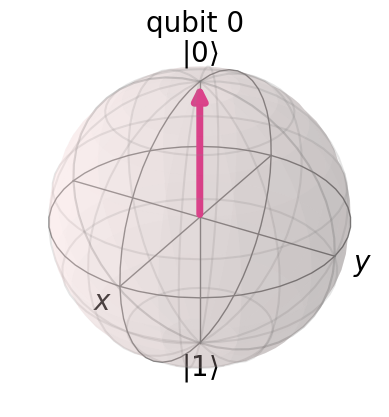

In [109]:
final_state.draw(output = 'bloch')

### **Exercise #10**

Adjust the code from Exercise #9 to use the variable provided for the probability of an error instead of hardcoding it in.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**



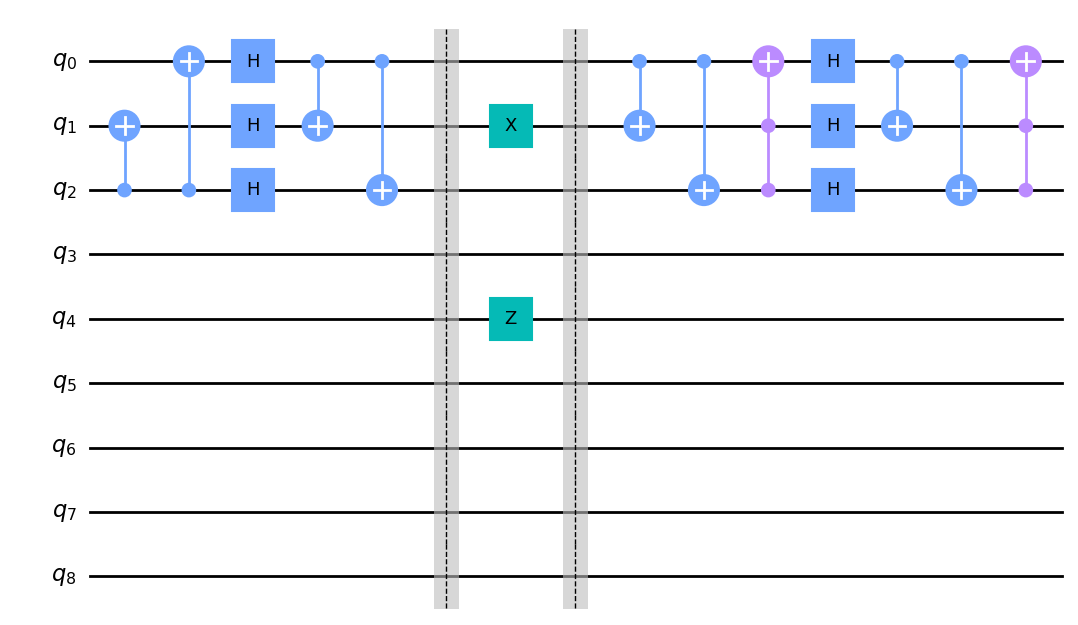

In [110]:

full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
probability = 0.10
for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()


# COMPLETE THIS CODE

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [111]:
initial_state.equiv(final_state)

True

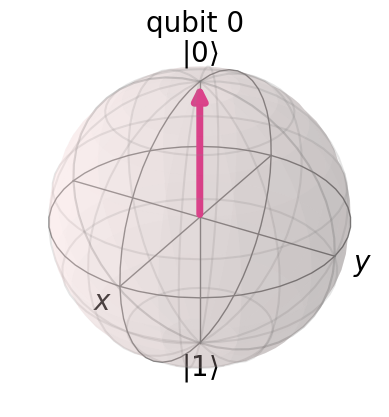

In [112]:
initial_state.draw(output = 'bloch')

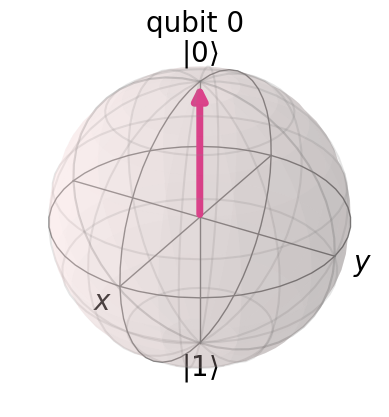

In [113]:
final_state.draw(output = 'bloch')

## **Part 3: Analzying the Shor Code**
---

In this section, we will learn how to analyze error correction simulations using a very important measurement in quantum physics: **state fidelity**. This measures how close two quantum states are to each other on a scale of 0 (completely different) to 1 (the same).

**Run the code below to calculate the fidelity between two qubits that are both in the $|0\rangle$ state (represented in vector notation).**

In [114]:
state_fidelity([1, 0], [1, 0])

1.0

### **Exercise #1**

Calculate the state fidelity between the $|0\rangle$ and $|1\rangle$ states.

In [117]:
state_fidelity([1,0],[0,1])# COMPLETE THIS CODE

0.0

### **Exercise #2**

Calculate the state fidelity between the $|1\rangle$ and $|0\rangle$ states to determine if the order of states matters.

In [118]:
state_fidelity([0,1],[1,0])# COMPLETE THIS CODE

0.0

### **Exercise #3**

Calculate the state fidelity between the $|0\rangle$ and $|+\rangle$ states.

**NOTE**: You may need to consult lessons from earlier in the year or other resources to determine the vector representation of the $|+\rangle state.

In [120]:
import math
state_fidelity([1,0],[1/math.sqrt(2),1/math.sqrt(2)])# COMPLETE THIS CODE


0.4999999999999999

### **Exercise #4**

Calculate the state fidelity between the $|0\rangle$ and $|-\rangle$ states.

In [122]:
state_fidelity([1,0],[1/math.sqrt(2),-1/math.sqrt(2)])# COMPLETE THIS CODE

0.4999999999999999

### **Exercise #5**

Complete the code below to calculate the state fidelity between the $|1\rangle$ and $|-\rangle$ states.

In [123]:
qc = QuantumCircuit(1)
qc.x(0)
initial_state = Statevector.from_instruction(qc)

# COMPLETE THIS LINE
qc.h(0)
final_state = Statevector.from_instruction(qc)

state_fidelity(initial_state, final_state)

0.4999999999999999

### **Exercise #6**

Write code to calculate the state fidelity between the $|00\rangle$ and $|\beta_{00}\rangle = \frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$ states.

In [124]:
state_fidelity([1,0,0,0],[1/math.sqrt(2),0,0,1/math.sqrt(2)])

0.4999999999999999

### **Exercise #7**

Write code to calculate the state fidelity between the initial and final states from Exercise #7 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: Given that these states are from before and after using an error correction scheme, do we want the state fidelity to be 0, 1, or something in between?

In [130]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])


#==========
# ERRORS
#==========
full_code.x(0)
#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
state_fidelity(initial_state,final_state)

1.0

### **Exercise #8**

Write code to calculate the state fidelity between the initial and final states from Exercise #10 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: If the probability is increased, what tends to happen to the fidelity? Test this out by altering your solution below as needed.

In [134]:

full_code = QuantumCircuit(9)

#==========
# # ENCODING
# #==========
# # Prepare the initial state and save its statevector
# # Prepare in the |0> state

# initial_state = Statevector.from_instruction(full_code)
# initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

# full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])


# #==========
# # ERRORS
# #==========
# probability = 0.10
# for i in range(9):
#   if random() < probability:
#     full_code.x(i)
#   if random() < probability:
#     full_code.z(i)

# #==========================
# # DETECTION AND CORRECTION
# #==========================

# full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# # Save the final statevector for comparison to the initial one
# final_state = Statevector.from_instruction(full_code)
# final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
# state_fidelity(initial_state,final_state)





#CHANGING PROBABILITY VALUE


initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])


#==========
# ERRORS
#==========
probability = 0.15

for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
state_fidelity(initial_state,final_state)


# COMPLETE THIS CODE

3.680050034621245e-103

### **Exercise #9**

Write a function that takes in a paramater, `probability`, and returns the fidelity before and after running the Shor code with errors that occur with the given probability.


**Hint**. This will look very similar to Exercise #8.

In [135]:
def get_fidelity(probability):
    return state_fidelity(initial_state,final_state)

  # COMPLETE THIS CODE

### **Exercise #10**

The code provided below graphs the *average* state fidelity using the Shor code with increasing probability of errors. You will use this to answer several final questions in your project summary.

**NOTE**: Be patient! This may take up to a minute to run since it is simulating many quantum circuits (technically `num_points` * `num_trials_per_point` circuits).

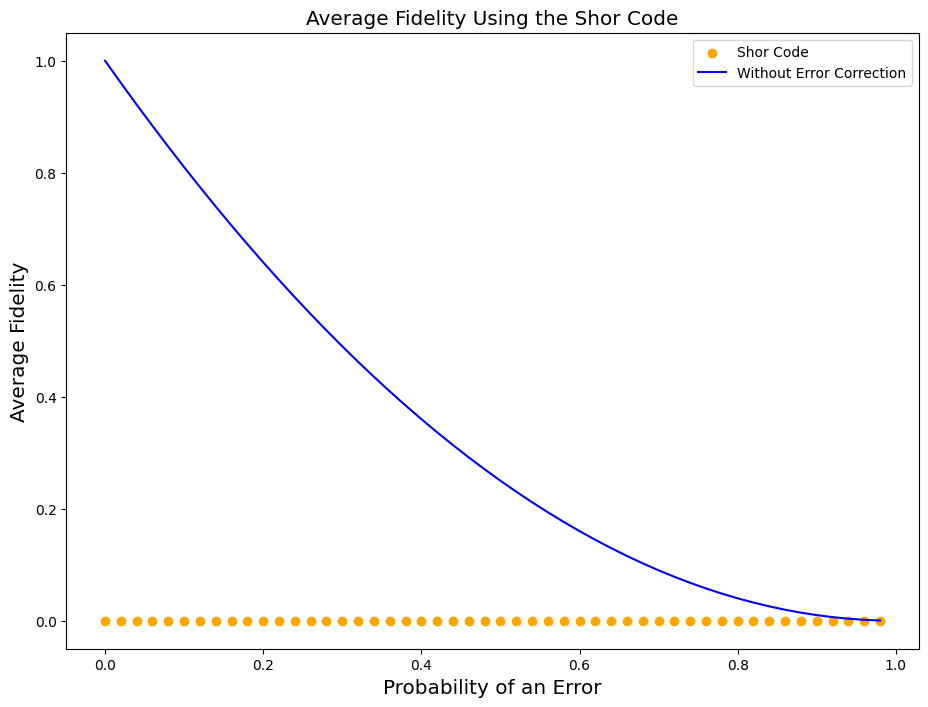

In [136]:
num_points = 50
num_trials_per_point = 100
average_fidelities_shor = []
probabilities = [p / num_points for p in range(num_points)]

for probability in probabilities:

  average_fidelity = 0
  for trial in range(num_trials_per_point):
    average_fidelity += get_fidelity(probability)

  average_fidelity /= num_trials_per_point
  
  average_fidelities_shor  += [average_fidelity]



plt.figure(figsize = (11, 8))
plt.scatter(probabilities, average_fidelities_shor, label = 'Shor Code', color = 'orange')
plt.plot(probabilities, [(1 - p)**2 for p in probabilities], label = 'Without Error Correction', color = 'blue')


plt.title("Average Fidelity Using the Shor Code", fontsize = 'x-large')
plt.xlabel("Probability of an Error", fontsize = 'x-large')
plt.ylabel("Average Fidelity", fontsize = 'x-large')
plt.legend()
plt.show()

## **Wrapping Up**

*Congratulations!* You have implemented and analyzed the Shor code in qiskit -- no small feat. To wrap up, please make sure to write a summary of the concepts covered here, including answers to the following questions:

1. How does using the Shor code compare to using no error correction? Are there any trends you notice?

1. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?

1. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?

1. With Shor's code,for any probability of error,the fidelity is 0 whereas for no error correction,the lesser the probability of error,the higher the fidelity.it makes the result of Shor's code more trustworthy than that of the no error correction code. The trend noticed was when propability of error was 1,fidelity was 0,same for Shor's code .  

2. As probability of errors is increasing, average fidelity remained 0. I think it is because since fidelity measures the closeness of quantum states and we are trying to achieve a measurement such that our initial state is equal to our final without either a phase flip or a bit flip,we are seeking total accuracy without any probability of error

3. I don't think so.


Summary of concepts </n>
- </n>Bit-flip  </n>
- </n>Phase-flip </n> 
- </n>Quantum error detection  </n>
- </n>Quantum encoding  </n>
- </n>Quantum error correction  </n> 
- </n>Merging quantum circuits  </n>
- </n>Fidelitty of states  </n>
- </n>Shor's code  </n>

# End of Lab

---

© 2023 The Coding School, All rights reserved